In [440]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.model_selection import train_test_split

In [441]:
boston= load_boston()
bos = pd.DataFrame(boston.data)

# 1. OWN VERSION OF SGDRegressor

#### > Featurisation 

In [442]:

# FEATURISATION is required to attain similar MSE as that of sklearn SGDRegressor

bos[13] = 1000 * bos[0]*bos[4]  * bos[5]/(bos[7] * bos[9])

#  FEATURISATION-LOGIC
#  bos[0] => Crime-Rate | range = [0,1) | needs to be minimised hence multiplied
#  bos[4] => Nitric-Oxide(NO) | range = [0,1) | needs to be minimised hence multiplied
#  bos[5] => no. of rooms/dwell | range>=0 | needs to be maximised hence multiplied
#  bos[7] => Distance to employment centres | range>=1(in-general) |needs to be minimised hence divided
#  bos[9] => Tax | range>=1(in-general) | needs to be minimised hence divided

#  new dataFrame is having a new custom column-13 which has featurised value by me and 
#  further to give some wightage to these custom-column13-values, 100 is multiplied in above featurisation formula 
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.001847
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.006842
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.007650
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.007709
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.016795
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,0.006532
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,0.016084
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,0.025262
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,0.032952
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,0.026094


In [443]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


In [444]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# adding last column as target label because SGD requires random sampling and hence we need to attach class labels with data
X_train['cost'] = np.array(Y_train)
X_test['cost'] = np.array(Y_test)

####  > Defining SGD parameters


In [445]:
w = np.zeros(14) # initial weight vector
# w = np.array([np.random.normal(loc = 0.0, scale = 1.0, size = 14)]) 
n = 9000 # n_iters
r = 0.01 # learning_rate
k= 50 # batch_size
b = 0 #considering zero_intercept

#### > My own SGDRegressor

In [446]:
for j in range(1,n):    
    batch = X_train.sample(k)
    x = np.array(batch.drop('cost',axis=1))
    y = np.array(batch['cost'])
    w_temp = np.zeros(14) 
    b_temp = 0
    
    for z in range(1,k): 
        q1 = -2 * x[z] 
        q2 = y[z]
        q3 = np.dot(w,x[z])
        q5 = (q2 - q3)
        q4 = (q1 * q5)
        w_temp= w_temp + q4
        b_temp = (-2)*( q2 - ( q3 + b ) )   
        
    w-=(r*w_temp/k)
    b-=(r*b_temp/k)


#### > Achieved Weight Vector

In [447]:
print("Achieved Weight Vector: \n\n",w)

Achieved Weight Vector: 

 [ 1.17086143  0.74730775 -0.73362867  0.55727437 -1.25325151  3.20668205
 -0.24720428 -2.05156827  2.83403376 -2.83875406 -2.51266015  0.80745851
 -3.40106585 -2.35805456]


#### > Achieved Intercept

In [448]:

print("Achieved Intercept:   ",b)

Achieved Intercept:    21.869065702196735


#### > Graphical Analysis of my SGDRegressor prediction 

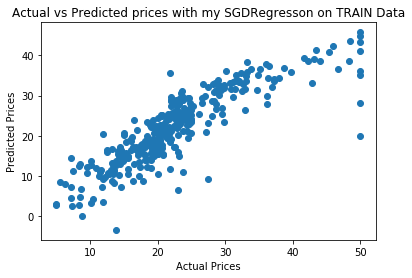

Mean Squared Error:  22.235266486672284


In [449]:

###### Plot on Train-Data ######
y_actual = X_train['cost']
y_pred = X_train.drop('cost',axis=1).dot(w.T) + b


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with my SGDRegresson on TRAIN Data')
plt.show()

loss1 = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",loss1)


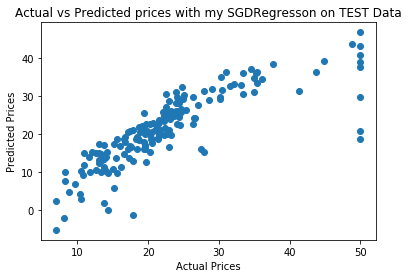

Mean Squared Error:  33.45862666219906


In [450]:

###### Plot on Test-Data ######
y_actual = X_test['cost']
y_pred =X_test.drop('cost',axis=1).dot(w.T) + b


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with my SGDRegresson on TEST Data')
plt.show()

loss2 = mean_squared_error(y_actual, y_pred)
print("Mean Squared Error: ",loss2)


# 2. skLearn SGDRegressor

#### > Regressor

In [451]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train = X_train.drop('cost',axis=1)
X_test= X_test.drop('cost',axis=1)

clf = SGDRegressor(learning_rate='constant', eta0=0.01, n_iter_no_change=9000)
clf.fit(X_train, Y_train)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=9000, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

####  > Graphical Analysis

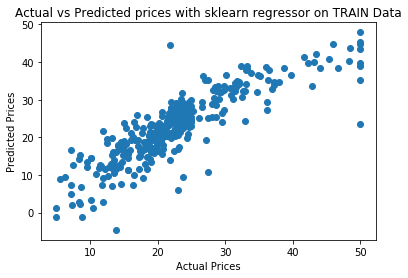

Mean Squared Error:  22.745116228084154


In [452]:
y_actual = Y_train
y_pred = clf.predict(X_train)


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with sklearn regressor on TRAIN Data')
plt.show()

loss3 = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",loss3)


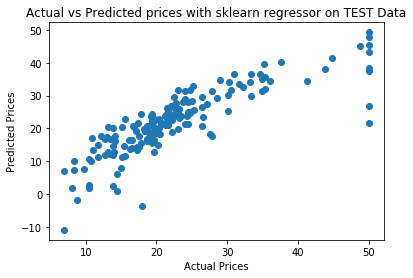

Mean Squared Error:  30.27464893481008


In [453]:
y_actual = Y_test
y_pred = clf.predict(X_test)


plt.scatter(y_actual,y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted prices with sklearn regressor on TEST Data')
plt.show()

loss4 = mean_squared_error(y_actual, y_pred)

print("Mean Squared Error: ",loss4)


#### > Achieved Intercept 

In [454]:
sk_intercept = clf.intercept_[0]
print("Achieved Intercept:  ",sk_intercept)

Achieved Intercept:   22.622194632661706


#### > Achieved Weight 

In [455]:
sk_weight = clf.coef_
print("Achieved Weight: \n\n", sk_weight)

Achieved Weight: 

 [-0.37474646  0.75243763 -0.24566374  1.2251619  -1.21268371  3.77959719
 -0.40525349 -2.85149291  2.29981031 -1.22197153 -2.30492584  1.05325166
 -3.85688011 -1.65559428]


## Tabular Comaparision of weights and MSE achieved in both cases 

In [456]:

from prettytable import PrettyTable
x= PrettyTable()

x.field_names = ["Wieght Index", "MY REGRESSOR WEIGHT", "SKLEARN REGRESSOR WEIGHT"]
for q in range(len(w)):
    x.add_row(["weight["+str(q)+"]", "{0:.4f}".format(w[q]), "{0:.4f}".format(sk_weight[q])])

print(x)

+--------------+---------------------+--------------------------+
| Wieght Index | MY REGRESSOR WEIGHT | SKLEARN REGRESSOR WEIGHT |
+--------------+---------------------+--------------------------+
|  weight[0]   |        1.1709       |         -0.3747          |
|  weight[1]   |        0.7473       |          0.7524          |
|  weight[2]   |       -0.7336       |         -0.2457          |
|  weight[3]   |        0.5573       |          1.2252          |
|  weight[4]   |       -1.2533       |         -1.2127          |
|  weight[5]   |        3.2067       |          3.7796          |
|  weight[6]   |       -0.2472       |         -0.4053          |
|  weight[7]   |       -2.0516       |         -2.8515          |
|  weight[8]   |        2.8340       |          2.2998          |
|  weight[9]   |       -2.8388       |         -1.2220          |
|  weight[10]  |       -2.5127       |         -2.3049          |
|  weight[11]  |        0.8075       |          1.0533          |
|  weight[

In [458]:
print('My MSE on Train Data: ', loss1)
print('Sklearn MSE on Train Data: ', loss3)


My MSE on Train Data:  22.235266486672284
Sklearn MSE on Train Data:  22.745116228084154


In [459]:
print('My MSE on Test Data: ', loss2)
print('Sklearn MSE on Test Data: ', loss4)

My MSE on Test Data:  33.45862666219906
Sklearn MSE on Test Data:  30.27464893481008


## CONCLUSIONS



##### FEATURISATION-LOGIC

##### * Featurisation formula:  bos[13] = 1000 * bos[0]*bos[4]  * bos[5]/(bos[7] * bos[9])

*  bos[0] => Crime-Rate | range = [0,1) | needs to be minimised hence multiplied
*  bos[4] => Nitric-Oxide(NO) | range = [0,1) | needs to be minimised hence multiplied
*  bos[5] => no. of rooms/dwell | range>=0 | needs to be maximised hence multiplied
*  bos[7] => Distance to employment centres | range>=1(in-general) |needs to be minimised hence divided
*  bos[9] => Tax | range>=1(in-general) | needs to be minimised hence divided

*  new dataFrame is having a new custom column-13 which has featurised value by me and further to give some wightage to these custom-column13-values, 100 is multiplied in above featurisation formula

##### Others Conclusions

* After trying numerous combinations of batch_size, n_iter, and learning_rate above used values are the one which results in most relatable skLearn outputs.

* Achieved MSE on my SGDRegressor is almost same as that of skLearn's Regressor in case of Train Data.

* In case of Test Data, achived MSE differs by just 3 units as compared to skLearn's Regressor. That I consider is NO bad.

* Since model is stochastic i.e it follows probabilistic methadology, so results may differ after every run but on every run MSE does not differ by more than just 3 or 4
